What kinds of games are most popular to play?
As an indie game developer, I would like to research the existed games online in the most popular gaming platform, Steam.
What genres of the games are most popular? 
Metrics:
Positive rate percentage
Owners

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('C:/Users/rache/Desktop/UK work/Portfolio projects/game project/steam.csv')

In [3]:
# Show the first 5 rows of dataset
df.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [4]:
# Check the dimensions of dataset
df.shape

(27075, 18)

In [5]:
df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


### Data Exploration

In [6]:
# Check null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [7]:
# Check duplicated values
df.duplicated().sum()

0

- ##### Check the column "categories", interested terms: "Multi-player", "Single-player"

In [8]:
# Check the column "categories", interested entries are "Multi-player", "Single-player", or both
list(df.categories.unique())

['Multi-player;Online Multi-Player;Local Multi-Player;Valve Anti-Cheat enabled',
 'Multi-player;Valve Anti-Cheat enabled',
 'Single-player;Multi-player;Valve Anti-Cheat enabled',
 'Multi-player;Online Multi-Player;Valve Anti-Cheat enabled',
 'Single-player;Multi-player;Online Multi-Player;Steam Cloud;Valve Anti-Cheat enabled',
 'Single-player',
 'Single-player;Steam Achievements;Steam Trading Cards;Captions available;Partial Controller Support;Steam Cloud;Includes Source SDK',
 'Multi-player;Cross-Platform Multiplayer;Steam Achievements;Steam Cloud;Valve Anti-Cheat enabled;Stats;Includes Source SDK',
 'Multi-player;Cross-Platform Multiplayer;Steam Achievements;Steam Trading Cards;Valve Anti-Cheat enabled;Stats;Includes Source SDK',
 'Multi-player;Valve Anti-Cheat enabled;Includes Source SDK',
 'Single-player;Commentary available',
 'Single-player;Steam Achievements;Captions available;Partial Controller Support;Steam Cloud;Stats;Includes Source SDK;Commentary available',
 'Single-player

- ##### Check the column "genres", interested terms: "Indie"

In [9]:
# Check the column "genres"
df.genres

0                        Action
1                        Action
2                        Action
3                        Action
4                        Action
                  ...          
27070    Adventure;Casual;Indie
27071    Action;Adventure;Indie
27072       Action;Casual;Indie
27073    Adventure;Casual;Indie
27074    Adventure;Casual;Indie
Name: genres, Length: 27075, dtype: object

In [10]:
# Select rows where the genre contains "Indie"
df[df['genres'].str.contains('Indie')].genres

26                        Indie
30               Indie;Strategy
31               Indie;Strategy
32               Indie;Strategy
33                        Indie
                  ...          
27070    Adventure;Casual;Indie
27071    Action;Adventure;Indie
27072       Action;Casual;Indie
27073    Adventure;Casual;Indie
27074    Adventure;Casual;Indie
Name: genres, Length: 19421, dtype: object

In [11]:
# Check the unique terms in column "genres" which contains "Indie"
df[df['genres'].str.contains('Indie')].genres.unique()

array(['Indie', 'Indie;Strategy', 'Action;Indie;RPG', 'Casual;Indie',
       'Action;Indie;Strategy', 'Indie;Simulation',
       'Casual;Strategy;Indie', 'Action;Indie',
       'Indie;Simulation;Strategy', 'Casual;Indie;Racing',
       'Action;Casual;Indie', 'Strategy;Indie', 'Indie;Casual',
       'Action;Indie;Sports', 'Indie;Racing;Sports',
       'Action;Indie;Early Access', 'Action;Free to Play;Indie',
       'Action;RPG;Indie', 'Action;Casual;Indie;Strategy',
       'Action;Indie;Racing;Sports', 'Action;Indie;Casual',
       'Adventure;Indie', 'Indie;Casual;Sports', 'Strategy;Action;Indie',
       'Indie;RPG', 'Nudity;Gore;Action;Adventure;Indie',
       'Gore;Action;Adventure;Indie', 'Action;Indie;Racing;Strategy',
       'Indie;RPG;Strategy', 'Indie;Simulation;Sports',
       'Casual;Indie;Strategy', 'Adventure;Casual;Indie',
       'RPG;Indie;Casual', 'Action;Adventure;Casual;Indie;RPG;Strategy',
       'Casual;Indie;Simulation;Strategy', 'Action;Adventure;Indie',
       'Stra

- ##### Check the column "required age"

In [12]:
# Check the numbers of different ages required for games
df.required_age.value_counts()

0     26479
18      308
16      192
12       73
7        12
3        11
Name: required_age, dtype: int64

- ##### Check the column "achievements"

In [13]:
# check the number of achievements
df.achievements.value_counts()

0       11864
10        679
12        618
20        574
15        490
        ...  
5394        1
678         1
2130        1
225         1
233         1
Name: achievements, Length: 410, dtype: int64

<AxesSubplot:xlabel='achievements'>

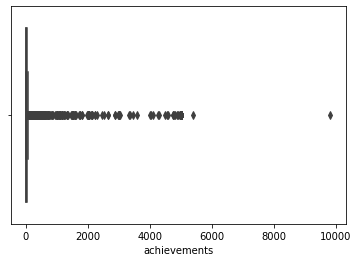

In [14]:
# Draw the boxplot, outliers discovered
sns.boxplot(x=df['achievements'])

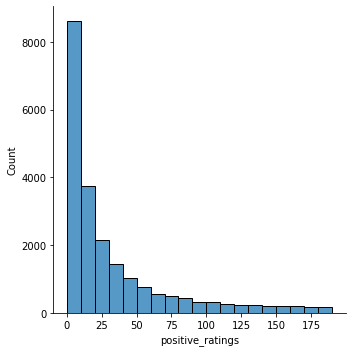

In [15]:
sns.displot(df, x="positive_ratings", bins=list(range(0, 200, 10)))

- ##### Check the positive rating and negative ratings

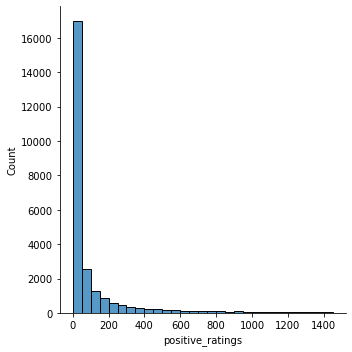

In [16]:
# Plot histograms for specific numerical columns
custom_bins = list(range(0, 1500, 50))
sns.displot(df, x="positive_ratings", bins=custom_bins)

<AxesSubplot:xlabel='positive_ratings'>

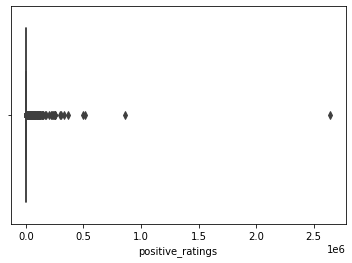

In [17]:
# draw the boxplot of column positive_ratings
# Outliers discovered
sns.boxplot(x=df['positive_ratings'])

<AxesSubplot:xlabel='negative_ratings'>

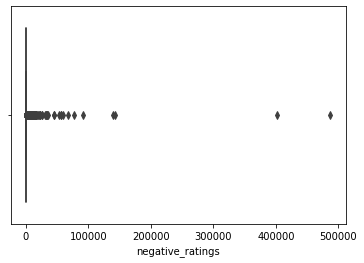

In [18]:
sns.boxplot(x=df['negative_ratings'])

- ##### Price

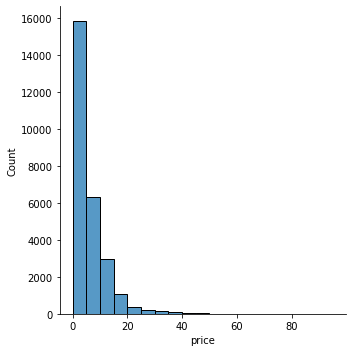

In [19]:
sns.displot(df, x="price", bins=list(range(0, 100, 5)))

<AxesSubplot:xlabel='price'>

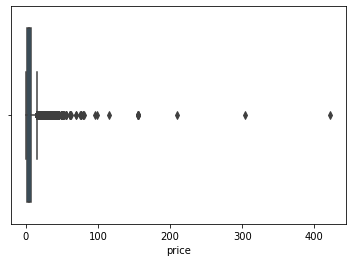

In [20]:
sns.boxplot(x=df['price'])

- ##### Owners

In [21]:
df.owners.unique()

array(['10000000-20000000', '5000000-10000000', '2000000-5000000',
       '20000000-50000000', '100000000-200000000', '50000000-100000000',
       '20000-50000', '500000-1000000', '100000-200000', '50000-100000',
       '1000000-2000000', '200000-500000', '0-20000'], dtype=object)

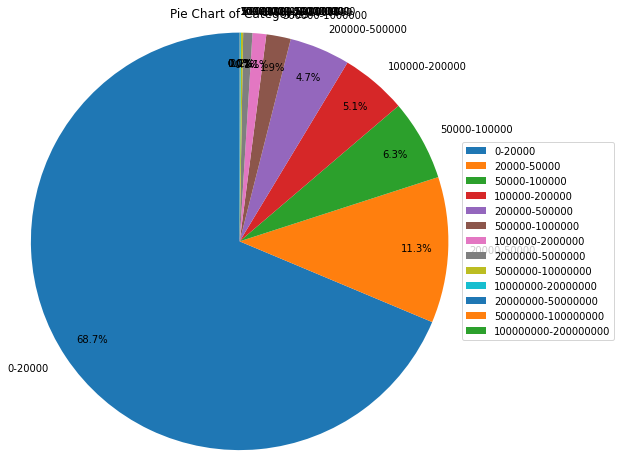

In [22]:
# Count the occurrences of each entry in the 'Category' column
category_counts = df.owners.value_counts()

# Set a larger figure size
plt.figure(figsize=(8, 8))

# Plot a pie chart with increased spacing
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, radius = 1.2,pctdistance=0.85, labeldistance=1.1)

# Add a title
plt.title('Pie Chart of Categories')

# Move the legend to a better location
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

In [23]:
# drop the unnecessary columns
df = df.drop(['appid','english','developer','publisher','platforms', 'categories','steamspy_tags','median_playtime'], axis=1)

### Data Transformation

- ##### Create one column which contains total ratings

In [24]:
# Calculate the numbers of total ratings and create a new column
df['total_ratings'] = df['positive_ratings'] + df['negative_ratings']

In [25]:
# Calculate the positive rate and create a new column
df['positive_rate'] = round(df['positive_ratings']/df['total_ratings'] , 2)

In [26]:
# drop the columns
df = df.drop(['negative_ratings'], axis=1)

- ##### Select the rows which are indie games

In [27]:
df = df.loc[df['genres'].str.contains('Indie')]

In [28]:
df.genres.unique()

array(['Indie', 'Indie;Strategy', 'Action;Indie;RPG', 'Casual;Indie',
       'Action;Indie;Strategy', 'Indie;Simulation',
       'Casual;Strategy;Indie', 'Action;Indie',
       'Indie;Simulation;Strategy', 'Casual;Indie;Racing',
       'Action;Casual;Indie', 'Strategy;Indie', 'Indie;Casual',
       'Action;Indie;Sports', 'Indie;Racing;Sports',
       'Action;Indie;Early Access', 'Action;Free to Play;Indie',
       'Action;RPG;Indie', 'Action;Casual;Indie;Strategy',
       'Action;Indie;Racing;Sports', 'Action;Indie;Casual',
       'Adventure;Indie', 'Indie;Casual;Sports', 'Strategy;Action;Indie',
       'Indie;RPG', 'Nudity;Gore;Action;Adventure;Indie',
       'Gore;Action;Adventure;Indie', 'Action;Indie;Racing;Strategy',
       'Indie;RPG;Strategy', 'Indie;Simulation;Sports',
       'Casual;Indie;Strategy', 'Adventure;Casual;Indie',
       'RPG;Indie;Casual', 'Action;Adventure;Casual;Indie;RPG;Strategy',
       'Casual;Indie;Simulation;Strategy', 'Action;Adventure;Indie',
       'Stra

- ##### Split the genres

In [29]:
df['Action'] = df['genres'].str.contains('Action')
df['Adventure'] = df['genres'].str.contains('Adventure')
df['Casual'] = df['genres'].str.contains('Casual')
df['RPG'] = df['genres'].str.contains('RPG')
df['Simulation'] = df['genres'].str.contains('Simulation')
df['Strategy'] = df['genres'].str.contains('Strategy')
df['Sports'] = df['genres'].str.contains('Sports')
df['MMO'] = df['genres'].str.contains('Massively Multiplayer')

In [30]:
df = df.drop('genres', axis=1).reset_index(drop=True)

### Data Visualization

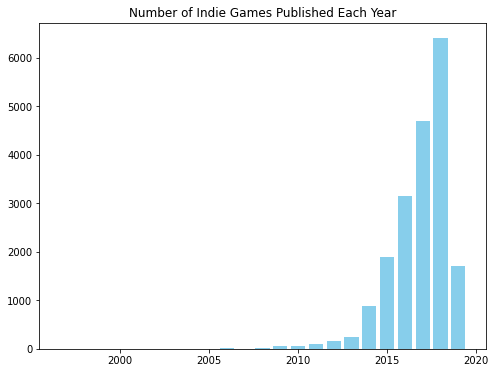

In [38]:
from scipy.interpolate import make_interp_spline

# Convert 'release_date' to datetime format and extract the year
df['release_year'] = pd.to_datetime(df['release_date']).dt.year

# Count the occurrences of each release year
yearly_counts = df['release_year'].value_counts()

# Sort the years in ascending order
yearly_counts = yearly_counts.sort_index()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot a bar chart based on the release year distribution
plt.bar(yearly_counts.index, yearly_counts, color='skyblue')

# Add data labels to the bars
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

# Add labels and title
#plt.xlabel('Release Year')
#plt.ylabel('Number of Indie Games Published')
plt.title('Number of Indie Games Published Each Year')

# Display the plot
plt.show()

In [32]:
# rate wjere required age is 0
round(df.required_age.value_counts()[0] / df.shape[0],3)


0.987

In [33]:
df.shape

(19421, 19)

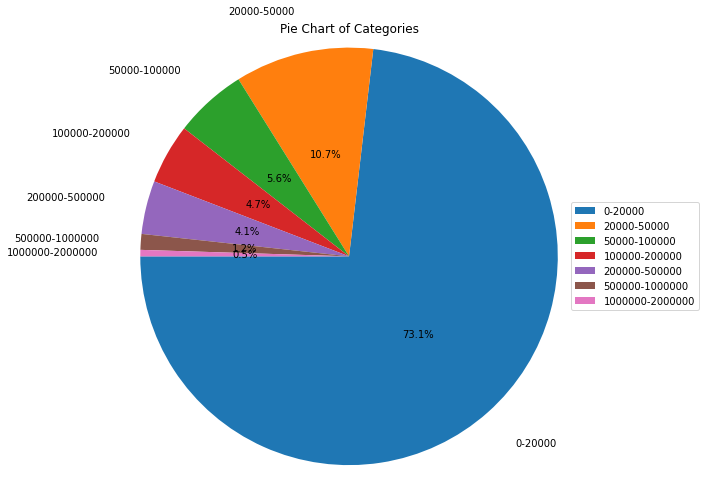

In [34]:
# Count the occurrences of each entry in the 'Category' column
category_counts = df.owners.value_counts()

# Set a larger figure size
plt.figure(figsize=(8, 8))

# Keep only the top two labels
top_labels = category_counts.index[:7]

# Plot a pie chart with increased spacing
plt.pie(category_counts[top_labels], labels=top_labels, autopct='%1.1f%%', startangle=-180, radius = 1.2, pctdistance=0.5, labeldistance=1.2)

# Add a title
plt.title('Pie Chart of Categories')

# Move the legend to a better location
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

,required_age,achievements,average_playtime,price,positive_rate,total_ratings
required_age,1.000000,-0.008513,0.005459,0.049849,-0.008409,0.047723
achievements,-0.008513,1.000000,0.024636,-0.014474,-0.026875,0.000598
average_playtime,0.005459,0.024636,1.000000,0.037332,0.018549,0.140160
price,0.049849,-0.014474,0.037332,1.000000,0.105337,0.091552
positive_rate,-0.008409,-0.026875,0.018549,0.105337,1.000000,0.056699
total_ratings,0.047723,0.000598,0.140160,0.091552,0.056699,1.000000


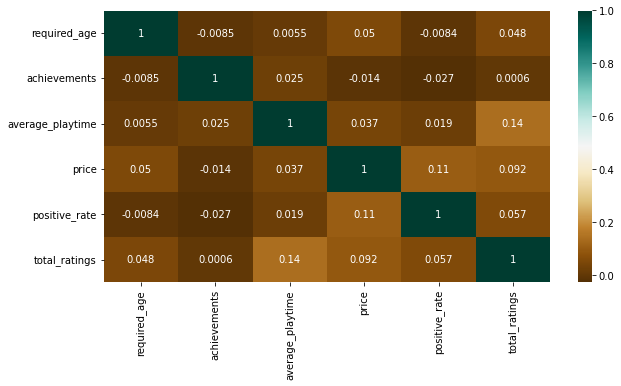

In [35]:
# Plot the scatter plot
temp = df[['required_age','achievements','average_playtime','price','positive_rate','total_ratings']]
plt.figure(figsize=(10,5))
c= temp.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

C:\Users\rache\AppData\Local\Temp/ipykernel_12752/1113053786.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genres_categories, rotation=45)


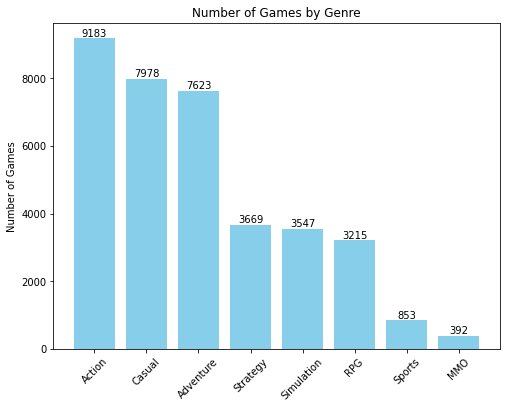

In [37]:
# Count the number of games labeled as "Action" and "Adventure"
action_count = df['Action'].sum()
adventure_count = df['Adventure'].sum()
casual_count = df['Casual'].sum()
rpg_count = df['RPG'].sum()
simulation_count = df['Simulation'].sum()
strategy_count = df['Strategy'].sum()
sports_count = df['Sports'].sum()
mmo_count = df['MMO'].sum()


# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

genres_list = [action_count, casual_count, adventure_count, strategy_count, simulation_count,rpg_count,sports_count, mmo_count]
genres_categories = ['Action', 'Casual', 'Adventure', 'Strategy', 'Simulation', 'RPG', 'Sports', 'MMO']

# Bar chart for counts of "Action" and "Adventure"
ax.bar(genres_categories, genres_list,
         color=['skyblue'])

# Add data labels to the bars
for i, count in enumerate(genres_list):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')


ax.set_xticklabels(genres_categories, rotation=45)

# Add labels and title
#plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Number of Games by Genre')

# Show the plot
plt.show()

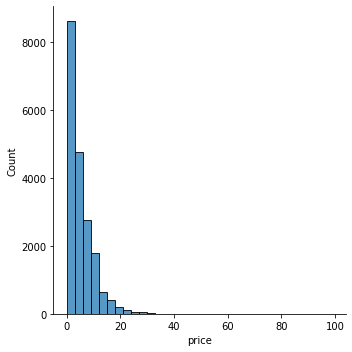

In [44]:
# Set up the figure and axis
sns.displot(df, x="price", bins=list(range(0, 100, 3)))

In [11]:
# transfer release date to year
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year

df = df.drop('release_date', axis=1)

In [12]:
# In categories, find multi-player and single-player 
df['style'] = ""

for i in range(len(df)):
    if "Multi-player" in df['categories'][i]:
        df.at[i, 'style'] = "Multiplayer"
    elif "Single-player" in df['categories'][i]:
        df.at[i, 'style'] = "Singleplayer"

df = df.drop('categories', axis=1)

In [13]:
# In steamspy_tags, find indie tag
df['Indie'] = ""

for i in range(len(df)):
    if "Indie" in df['steamspy_tags'][i]:
        df.at[i, 'Indie'] = 1
    else:
        df.at[i, 'Indie'] = 0

df['Indie'] = df['Indie'].astype(int)

df = df.drop('steamspy_tags', axis=1)

In [14]:
# split the tags column
# df['steamspy_tags'] = df['steamspy_tags'].str.split(';')

In [15]:
# calculate the positive rate percentage and total ratings
df['positive_rate_pct'] = round(df['positive_ratings'] / (df['positive_ratings'] + df['negative_ratings']) , 2)
df['total_ratings'] = df['positive_ratings'] + df['negative_ratings']

df = df.drop(['negative_ratings'], axis=1)

In [16]:
df.owners.unique()

array(['10000000-20000000', '5000000-10000000', '2000000-5000000',
       '20000000-50000000', '100000000-200000000', '50000000-100000000',
       '20000-50000', '500000-1000000', '100000-200000', '50000-100000',
       '1000000-2000000', '200000-500000', '0-20000'], dtype=object)

In [17]:
# rewrite the column owners, to make it more clearly
df['owners'] = df['owners'].replace({'0-20000': '0-20k', 
                                    '20000-50000': '20k-50k',
                                    '50000-100000': '50k-100k',
                                    '100000-200000': '100k-200k',
                                    '200000-500000': '200k-500k',
                                    '500000-1000000': '500k-1m',
                                    '1000000-2000000': '1m-2m',
                                    '2000000-5000000': '2m-5m',
                                    '5000000-10000000': '5m-10m',
                                    '10000000-20000000': '10m-20m',
                                    '20000000-50000000': '20m-50m',
                                    '50000000-100000000': '50m-100m',
                                    '100000000-200000000': '100m-200m'})

In [18]:
# Assume: total rating is the total user; calcuate the game revenue
df['revenue'] = df['price'] *df['total_ratings']

Draw graphs

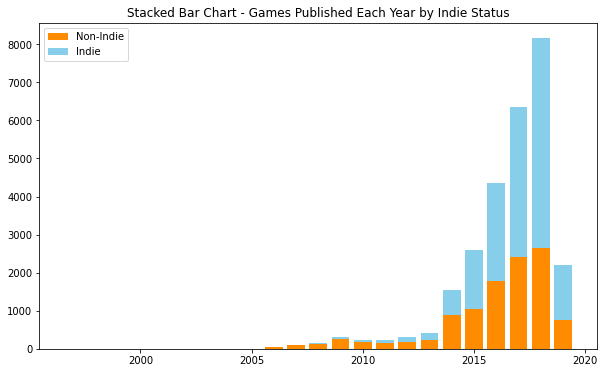

In [20]:
# games published every year

# Count the number of games published each year and by indie status
yearly_counts = df.groupby(['year', 'Indie']).size().unstack(fill_value=0)


# Plot a stacked bar chart
plt.figure(figsize=(10, 6))
indie_labels = ['Non-Indie', 'Indie']

plt.bar(yearly_counts.index, yearly_counts[0], color='darkorange', label=indie_labels[0])
plt.bar(yearly_counts.index, yearly_counts[1], color='skyblue', bottom=yearly_counts[0], label=indie_labels[1])

# Add labels and title
plt.title('Stacked Bar Chart - Games Published Each Year by Indie Status')

# Add legend
plt.legend()

# Show the plot
plt.show()


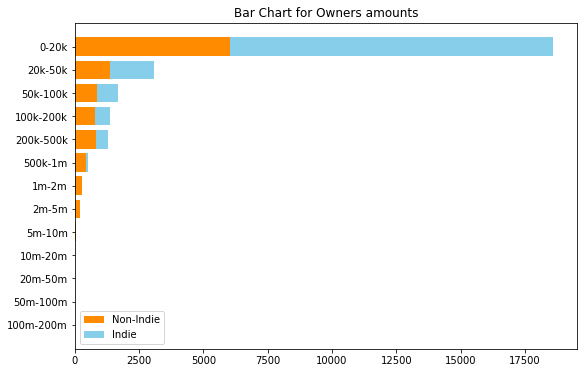

In [21]:
# owner

owners_counts = df.groupby(['owners', 'Indie']).size().unstack(fill_value=0)
# Sum the counts for each owner and sort the DataFrame by the total count in descending order
owners_counts['Total'] = owners_counts.sum(axis=1)
owners_counts = owners_counts.sort_values(by='Total', ascending=True).drop('Total', axis=1)

# Plot a bar chart
plt.figure(figsize=(9, 6))

indie_labels = ['Non-Indie', 'Indie']

plt.barh(owners_counts.index, owners_counts[0], color='darkorange', label=indie_labels[0])
plt.barh(owners_counts.index, owners_counts[1], color='skyblue', left=owners_counts[0], label=indie_labels[1])

# plt.barh(owners_counts['owners'], owners_counts['Count'], color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Bar Chart for Owners amounts')

# Add legend
plt.legend()

# Show the plot
plt.show()


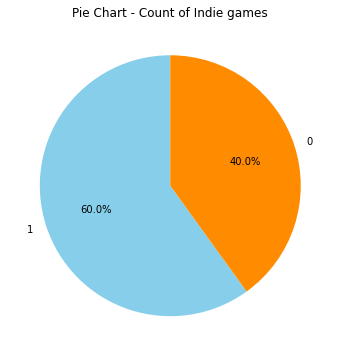

In [22]:
# Count the occurrences of each value in the column
indie_counts = df['Indie'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(indie_counts, labels=indie_counts.index, autopct='%1.1f%%', colors=['skyblue', 'darkorange'], startangle=90)

# Add title
plt.title('Pie Chart - Count of Indie games')

# Show the plot
plt.show()


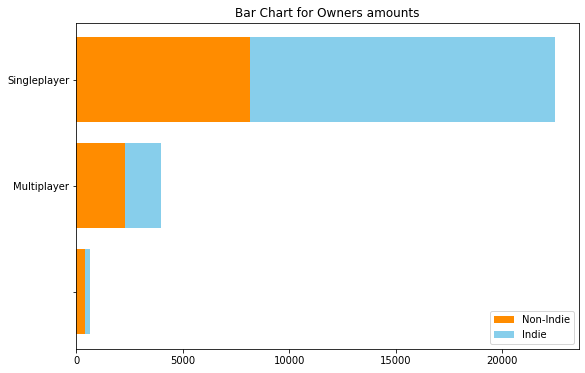

In [23]:
# style

style_counts = df.groupby(['style', 'Indie']).size().unstack(fill_value=0)
# Sum the counts for each owner and sort the DataFrame by the total count in descending order
style_counts['Total'] = style_counts.sum(axis=1)
style_counts = style_counts.sort_values(by='Total', ascending=True).drop('Total', axis=1)

# Plot a bar chart
plt.figure(figsize=(9, 6))

indie_labels = ['Non-Indie', 'Indie']

plt.barh(style_counts.index, style_counts[0], color='darkorange', label=indie_labels[0])
plt.barh(style_counts.index, style_counts[1], color='skyblue', left=style_counts[0], label=indie_labels[1])

# plt.barh(owners_counts['owners'], owners_counts['Count'], color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Bar Chart for Owners amounts')

# Add legend
plt.legend()

# Show the plot
plt.show()